# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
faixa_latitude = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['abaixo_de_-10.5', 'acima_de_-10.5'])

# Adicionar a nova coluna ao DataFrame
sinasc_raw['faixa_latitude'] = faixa_latitude

# Agrupar pelos faixas de latitude
resultados = sinasc_raw.groupby('faixa_latitude', observed=False).agg(
    soma_QTDFILVIVO=('QTDFILVIVO', 'sum'),
    media_QTDFILVIVO=('QTDFILVIVO', 'mean'),
    minimo_QTDFILVIVO=('QTDFILVIVO', 'min'),
    maximo_QTDFILVIVO=('QTDFILVIVO', 'max'),
    mediana_QTDFILVIVO=('QTDFILVIVO', 'median'),
    desvio_padrao_QTDFILVIVO=('QTDFILVIVO', 'std'),
    variancia_QTDFILVIVO=('QTDFILVIVO', 'var'),
    
    soma_QTDFILMORT=('QTDFILMORT', 'sum'),
    media_QTDFILMORT=('QTDFILMORT', 'mean'),
    minimo_QTDFILMORT=('QTDFILMORT', 'min'),
    maximo_QTDFILMORT=('QTDFILMORT', 'max'),
    mediana_QTDFILMORT=('QTDFILMORT', 'median'),
    desvio_padrao_QTDFILMORT=('QTDFILMORT', 'std'),
    variancia_QTDFILMORT=('QTDFILMORT', 'var')
)

# Renomear 
resultados.rename(columns={
    'soma_QTDFILVIVO': 'Soma da Quantidade Filhos Vivos',
    'media_QTDFILVIVO': 'Média da Quantidade Filhos Vivos',
    'minimo_QTDFILVIVO': 'Mínimo da Quantidade Filhos Vivos',
    'maximo_QTDFILVIVO': 'Máximo da Quantidade Filhos Vivos',
    'mediana_QTDFILVIVO': 'Mediana da Quantidade Filhos Vivos',
    'desvio_padrao_QTDFILVIVO': 'Desvio Padrão da Quantidade Filhos Vivos',
    'variancia_QTDFILVIVO': 'Variância da Quantidade Filhos Vivos',
    
    'soma_QTDFILMORT': 'Soma da Quantidade de Filhos Mortos',
    'media_QTDFILMORT': 'Média da Quantidade de Filhos Mortos',
    'minimo_QTDFILMORT': 'Mínimo da Quantidade de Filhos Mortos',
    'maximo_QTDFILMORT': 'Máximo da Quantidade de Filhos Mortos',
    'mediana_QTDFILMORT': 'Mediana da Quantidade de Filhos Mortos',
    'desvio_padrao_QTDFILMORT': 'Desvio Padrão da Quantidade de Filhos Mortos',
    'variancia_QTDFILMORT': 'Variância da Quantidade de Filhos Mortos'
}, inplace=True)

print(resultados)

                 Soma da Quantidade Filhos Vivos  \
faixa_latitude                                     
abaixo_de_-10.5                          12600.0   
acima_de_-10.5                           14226.0   

                 Média da Quantidade Filhos Vivos  \
faixa_latitude                                      
abaixo_de_-10.5                          0.980011   
acima_de_-10.5                           1.129317   

                 Mínimo da Quantidade Filhos Vivos  \
faixa_latitude                                       
abaixo_de_-10.5                                0.0   
acima_de_-10.5                                 0.0   

                 Máximo da Quantidade Filhos Vivos  \
faixa_latitude                                       
abaixo_de_-10.5                               30.0   
acima_de_-10.5                                12.0   

                 Mediana da Quantidade Filhos Vivos  \
faixa_latitude                                        
abaixo_de_-10.5                   

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
faixa_area = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['abaixo_de_3000', 'acima_de_3000'])

sinasc_raw['faixa_area'] = faixa_area

resultados = sinasc_raw.groupby('faixa_area', observed=False).agg(
    soma_QTDFILVIVO=('QTDFILVIVO', 'sum'),
    media_QTDFILVIVO=('QTDFILVIVO', 'mean'),
    minimo_QTDFILVIVO=('QTDFILVIVO', 'min'),
    maximo_QTDFILVIVO=('QTDFILVIVO', 'max'),
    mediana_QTDFILVIVO=('QTDFILVIVO', 'median'),
    desvio_padrao_QTDFILVIVO=('QTDFILVIVO', 'std'),
    variancia_QTDFILVIVO=('QTDFILVIVO', 'var'),
    
    soma_KOTELCHUCK=('KOTELCHUCK', 'sum'),
    media_KOTELCHUCK=('KOTELCHUCK', 'mean'),
    minimo_KOTELCHUCK=('KOTELCHUCK', 'min'),
    maximo_KOTELCHUCK=('KOTELCHUCK', 'max'),
    mediana_KOTELCHUCK=('KOTELCHUCK', 'median'),
    desvio_padrao_KOTELCHUCK=('KOTELCHUCK', 'std'),
    variancia_KOTELCHUCK=('KOTELCHUCK', 'var')
)

# Renomear 
resultados.rename(columns={
    'soma_QTDFILVIVO': 'Soma da Quantidade Filhos Vivos',
    'media_QTDFILVIVO': 'Média da Quantidade Filhos Vivos',
    'minimo_QTDFILVIVO': 'Mínimo da Quantidade Filhos Vivos',
    'maximo_QTDFILVIVO': 'Máximo da Quantidade Filhos Vivos',
    'mediana_QTDFILVIVO': 'Mediana da Quantidade Filhos Vivos',
    'desvio_padrao_QTDFILVIVO': 'Desvio Padrão da Quantidade Filhos Vivos',
    'variancia_QTDFILVIVO': 'Variância da Quantidade Filhos Vivos',
    
    'soma_KOTELCHUCK': 'Soma do índice de KOTELCHUCK',
    'media_KOTELCHUCK': 'Média do índice de KOTELCHUCK',
    'minimo_KOTELCHUCK': 'Mínimo do índice de KOTELCHUCK',
    'maximo_KOTELCHUCK': 'Máximo do índice de KOTELCHUCK',
    'mediana_KOTELCHUCK': 'Mediana do índice de KOTELCHUCK',
    'desvio_padrao_KOTELCHUCK': 'Desvio Padrão do índice de KOTELCHUCK',
    'variancia_KOTELCHUCK': 'Variância do índice de KOTELCHUCK'
}, inplace=True)

print(resultados)

                Soma da Quantidade Filhos Vivos  \
faixa_area                                        
abaixo_de_3000                           4773.0   
acima_de_3000                           22053.0   

                Média da Quantidade Filhos Vivos  \
faixa_area                                         
abaixo_de_3000                          0.924284   
acima_de_3000                           1.086890   

                Mínimo da Quantidade Filhos Vivos  \
faixa_area                                          
abaixo_de_3000                                0.0   
acima_de_3000                                 0.0   

                Máximo da Quantidade Filhos Vivos  \
faixa_area                                          
abaixo_de_3000                               30.0   
acima_de_3000                                14.0   

                Mediana da Quantidade Filhos Vivos  \
faixa_area                                           
abaixo_de_3000                                 1.0  

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [15]:
faixa_area = pd.cut(sinasc_raw['munResAlt'], bins=[-float('inf'), 3000, float('inf')], labels=['abaixo_de_3000', 'acima_de_3000'])

sinasc_raw['faixa_area'] = faixa_area

resultados = sinasc_raw.groupby('faixa_area', observed=False).agg(
    soma_QTDFILMORT=('QTDFILMORT', 'sum'),
    media_QTDFILMORT=('QTDFILMORT', 'mean'),
    minimo_QTDFILMORT=('QTDFILMORT', 'min'),
    maximo_QTDFILMORT=('QTDFILMORT', 'max'),
    mediana_QTDFILMORT=('QTDFILMORT', 'median'),
    desvio_padrao_QTDFILMORT=('QTDFILMORT', 'std'),
    variancia_QTDFILMORT=('QTDFILMORT', 'var'),
    
    soma_KOTELCHUCK=('KOTELCHUCK', 'sum'),
    media_KOTELCHUCK=('KOTELCHUCK', 'mean'),
    minimo_KOTELCHUCK=('KOTELCHUCK', 'min'),
    maximo_KOTELCHUCK=('KOTELCHUCK', 'max'),
    mediana_KOTELCHUCK=('KOTELCHUCK', 'median'),
    desvio_padrao_KOTELCHUCK=('KOTELCHUCK', 'std'),
    variancia_KOTELCHUCK=('KOTELCHUCK', 'var')
)

resultados.rename(columns={
    'soma_QTDFILMORT': 'Soma QTDFILMORT',
    'media_QTDFILMORT': 'Média QTDFILMORT',
    'minimo_QTDFILMORT': 'Mínimo QTDFILMORT',
    'maximo_QTDFILMORT': 'Máximo QTDFILMORT',
    'mediana_QTDFILMORT': 'Mediana QTDFILMORT',
    'desvio_padrao_QTDFILMORT': 'Desvio Padrão QTDFILMORT',
    'variancia_QTDFILMORT': 'Variância QTDFILMORT',
    
    'soma_KOTELCHUCK': 'Soma KOTELCHUCK',
    'media_KOTELCHUCK': 'Média KOTELCHUCK',
    'minimo_KOTELCHUCK': 'Mínimo KOTELCHUCK',
    'maximo_KOTELCHUCK': 'Máximo KOTELCHUCK',
    'mediana_KOTELCHUCK': 'Mediana KOTELCHUCK',
    'desvio_padrao_KOTELCHUCK': 'Desvio Padrão KOTELCHUCK',
    'variancia_KOTELCHUCK': 'Variância KOTELCHUCK'
}, inplace=True)

print(resultados)


                Soma QTDFILMORT  Média QTDFILMORT  Mínimo QTDFILMORT  \
faixa_area                                                             
abaixo_de_3000           6643.0          0.266477                0.0   
acima_de_3000               0.0               NaN                NaN   

                Máximo QTDFILMORT  Mediana QTDFILMORT  \
faixa_area                                              
abaixo_de_3000               28.0                 0.0   
acima_de_3000                 NaN                 NaN   

                Desvio Padrão QTDFILMORT  Variância QTDFILMORT  \
faixa_area                                                       
abaixo_de_3000                  0.613903              0.376877   
acima_de_3000                        NaN                   NaN   

                Soma KOTELCHUCK  Média KOTELCHUCK  Mínimo KOTELCHUCK  \
faixa_area                                                             
abaixo_de_3000           134462          4.975099                1.0   
a

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


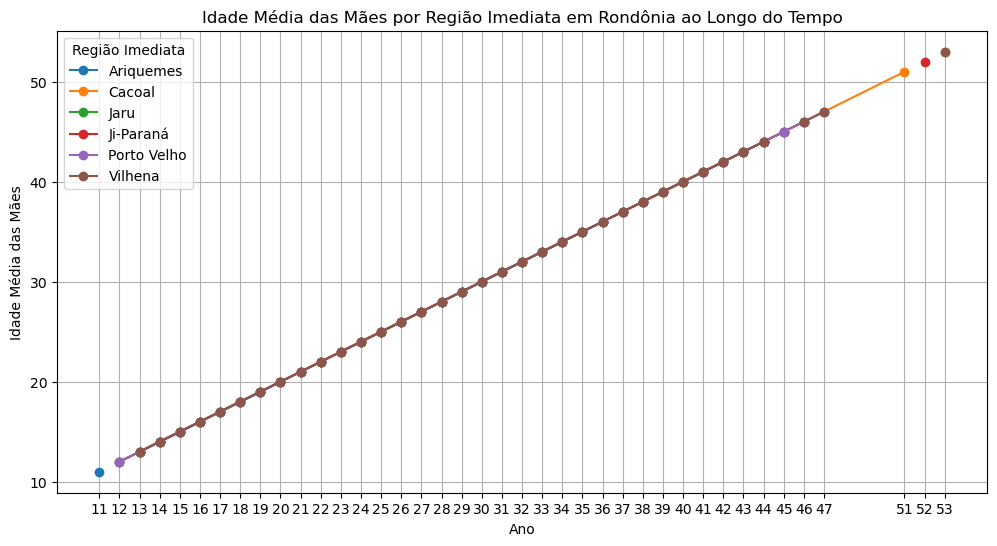

In [43]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}


# Adicionando a coluna de região com base no dicionário
sinasc_raw['regiao'] = sinasc_raw['munResNome'].map(imediatas)

# Calculando a média da idade por região e ano
media_idade_por_regiao = sinasc_raw.groupby(['IDADEMAE', 'regiao'])['IDADEMAE'].mean().unstack()

# Plotando
plt.figure(figsize=(12, 6))
for regiao in media_idade_por_regiao.columns:
    plt.plot(media_idade_por_regiao.index, media_idade_por_regiao[regiao], marker='o', label=regiao)

plt.title('Idade Média das Mães por Região Imediata em Rondônia ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata')
plt.grid()
plt.xticks(media_idade_por_regiao.index)  
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [19]:
sinasc_2 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_3 = sinasc_2.set_index('munResNome')

idh_mapping = {
    'IDH alto': ['Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura'],
    'IDH médio': ['Cerejeiras', 'Jaru', 'Colorado do Oeste', 'Ouro Preto do Oeste', 'Espigão d\'Oeste',
                  'Santa Luzia d\'Oeste', 'Pimenteiras do Oeste', 'Presidente Médici', 'Castanheiras',
                  'Guajará-Mirim', 'Chupinguaia', 'Cabixi', 'Candeias do Jamari', 'São Felipe d\'Oeste',
                  'Cacaulândia', 'São Miguel do Guaporé', 'Mirante da Serra', 'Alvorada d\'Oeste',
                  'Teixeirópolis', 'Nova Brasilândia d\'Oeste', 'Rio Crespo', 'Primavera de Rondônia',
                  'Alta Floresta d\'Oeste', 'Ministro Andreazza', 'Novo Horizonte do Oeste', 'Vale do Paraíso',
                  'Alto Paraíso', 'Parecis', 'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim',
                  'Costa Marques', 'São Francisco do Guaporé', 'Urupá', 'Monte Negro'],
    'IDH baixo': ['Seringueiras', 'Governador Jorge Teixeira', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia',
                  'Alto Alegre dos Parecis', 'Theobroma', 'Nova União', 'Nova Mamoré', 'Vale do Anari']
}

sinasc_3['IDH'] = sinasc_3.index.map(lambda x: next((idh for idh, municipios in idh_mapping.items() if x in municipios), None))

media_idade = sinasc_3.groupby('IDH')[['IDADEMAE', 'IDADEPAI']].mean()

print(media_idade)


            IDADEMAE   IDADEPAI
IDH                            
IDH alto   26.280332  31.074091
IDH baixo  25.269231  30.402332
IDH médio  25.848191  31.570029


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [21]:
sinasc_2 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_3 = sinasc_2.set_index('munResNome')

# Mapeamento do Índice de Desenvolvimento
desenvolvimento_mapping = {
    'Desenvolvimento moderado': ['Ariquemes', 'Vilhena', 'Pimenta Bueno', 'Porto Velho', 'Ji-Paraná', 'Cacoal', 
                                  'Santa Luzia d\'Oeste', 'Rolim de Moura', 'Chupinguaia', 'São Miguel do Guaporé', 
                                  'Pimenteiras do Oeste', 'Teixeirópolis', 'Colorado do Oeste', 'Jaru', 
                                  'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste', 
                                  'Ouro Preto do Oeste', 'São Francisco do Guaporé', 'Candeias do Jamari', 
                                  'Buritis', 'São Felipe d\'Oeste', 'Presidente Médici', 'Cerejeiras', 
                                  'Monte Negro', 'Urupá'],
    'Desenvolvimento regular': ['Espigão d\'Oeste', 'Seringueiras', 'Alvorada d\'Oeste', 'Itapuã do Oeste', 
                                'Cabixi', 'Novo Horizonte do Oeste', 'Nova Brasilândia d\'Oeste', 
                                'Vale do Paraíso', 'Corumbiara', 'Alto Paraíso', 'Cacaulândia', 
                                'Vale do Anari', 'Ministro Andreazza', 'Costa Marques', 'Nova União', 
                                'Guajará-Mirim', 'Mirante da Serra', 'Parecis', 'Castanheiras', 
                                'Theobroma', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia', 
                                'Nova Mamoré', 'Cujubim', 'Alto Alegre dos Parecis', 
                                'Governador Jorge Teixeira'],
    'Desenvolvimento alto': [],
    'Desenvolvimento baixo': []
}

sinasc_3['Desenvolvimento'] = sinasc_3.index.map(lambda x: next((des for des, municipios in desenvolvimento_mapping.items() if x in municipios), None))

media_idade_desenvolvimento = sinasc_3.groupby('Desenvolvimento')[['IDADEMAE', 'IDADEPAI']].mean()

print(media_idade_desenvolvimento)


                           IDADEMAE   IDADEPAI
Desenvolvimento                               
Desenvolvimento moderado  26.226921  31.145206
Desenvolvimento regular   25.412005  31.345297


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [23]:
sinasc_2 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_3 = sinasc_2.set_index('munResNome')

# Mapeamento do PIB
pib_mapping = {
    'Acima de 1 Bilhão': ['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura', 'Pimenta Bueno'],
    'Acima de 500 Milhões': ['Guajará-Mirim', 'Ouro Preto do Oeste', 'Buritis', 'Machadinho do Oeste', 'Espigão d\'Oeste', 
                             'São Miguel do Guaporé', 'Candeias do Jamari', 'Nova Mamoré', 'Cerejeiras'],
    'Acima de 300 Milhões': ['Alta Floresta do Oeste', 'Presidente Médici', 'Cujubim', 'Nova Brasilândia do Oeste', 
                             'Alto Paraíso', 'São Francisco do Guaporé', 'Colorado do Oeste'],
    'Acima de 200 Milhões': ['Monte Negro', 'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste'],
    'Acima de 100 Milhões': ['Chupinguaia', 'Corumbiara', 'Ministro Andreazza', 'Urupá', 'Costa Marques', 
                             'Seringueiras', 'Mirante da Serra', 'Governador Jorge Teixeira', 'Theobroma', 
                             'Santa Luzia do Oeste', 'Novo Horizonte do Oeste', 'Itapuã do Oeste', 
                             'Vale do Paraíso', 'Cacaulândia', 'Cabixi', 'Vale do Anari'],
    'Até 100 Milhões': ['Nova União', 'Parecis', 'Rio Crespo', 'Pimenteiras do Oeste', 'Teixeirópolis', 
                        'São Felipe do Oeste', 'Castanheiras', 'Primavera de Rondônia']
}

sinasc_3['PIB'] = sinasc_3.index.map(lambda x: next((pib for pib, municipios in pib_mapping.items() if x in municipios), None))

media_idade_pib = sinasc_3.groupby('PIB')[['IDADEMAE', 'IDADEPAI']].mean()

print(media_idade_pib)

                       IDADEMAE   IDADEPAI
PIB                                       
Acima de 1 Bilhão     26.265562  31.108387
Acima de 100 Milhões  25.638424  31.744348
Acima de 200 Milhões  25.146435  30.187500
Acima de 300 Milhões  25.706070  30.819149
Acima de 500 Milhões  25.785927  31.381955
Até 100 Milhões       26.519894  31.626126


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Descobri que a média da idade dos pais não sofrem grandes influências do IDH, IFDM e PIB